In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import matplotlib


In [2]:
A = 15e-12
D = 3e-3
K = 0.5e6
u = (0, 0, 1)
gamma0 = 2.211e5
alpha = 0.3


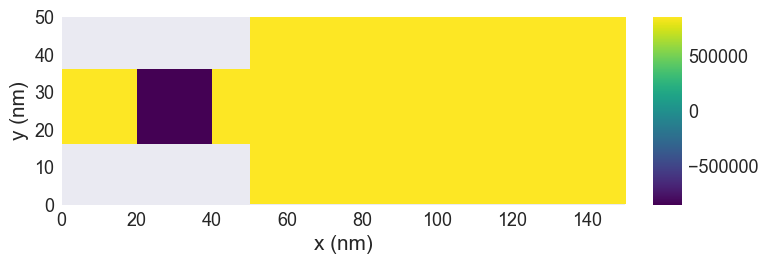

In [3]:
region = df.Region(p1=(0,0,0), p2=(150e-9, 50e-9, 2e-9))
mesh = df.Mesh(region=region, cell=(2e-9, 2e-9, 2e-9))

system = mm.System(name='sim1')
Ms = 8.6e5
def Ms_values(point):
    x, y, z = point
    if x < 50e-9 and y >15e-9 and y < 35e-9:
        return Ms
    elif 50e-9 < x <150e-9:
        return Ms
    else:
        return 0

def m_values(point):
    x, y, z = point
    if 20e-9< x < 40e-9 and y >15e-9 and y < 35e-9:
        return (0.1, 0.1, -1)
    else:
        return (0.1,0.1,1)
system.m = df.Field(mesh, nvdim=3, value=m_values, norm=Ms_values, valid="norm")
system.m.z.sel("z").mpl.scalar()

OOMMFTCL is set, but OOMMF could not be run.
stdout:
b''
stderr:
b'couldn\'t read file "C:\\Users\\Sagar Nanda\\Downloads\\oommf20b0_20220930\\oommf\\oommf.tcl": no such file or directory\r\n'


Running OOMMF (ExeOOMMFRunner)[2024/12/24 14:01]... (8.4 s)


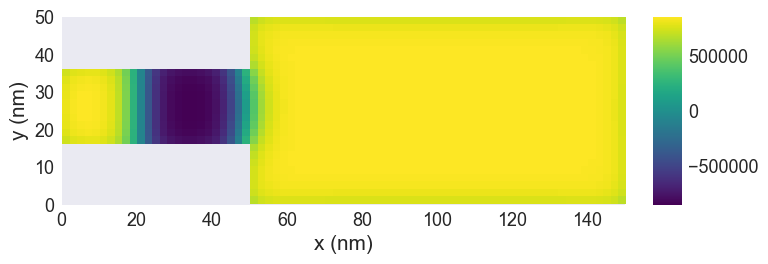

In [4]:
system.energy = mm.Exchange(A=A) + mm.DMI(D=D, crystalclass='Cnv_z') + mm.UniaxialAnisotropy(K=K, u=u)
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)

md = oc.MinDriver()
md.drive(system)
system.m.z.sel("z").mpl.scalar()

In [5]:
ux = 400
beta = 0.5

system.dynamics += mm.ZhangLi(u=ux, beta=beta)


Running OOMMF (ExeOOMMFRunner):   0%|          | 0/200 files written [00:00]

Running OOMMF (ExeOOMMFRunner)[2024/12/24 14:01] took 11.8 s


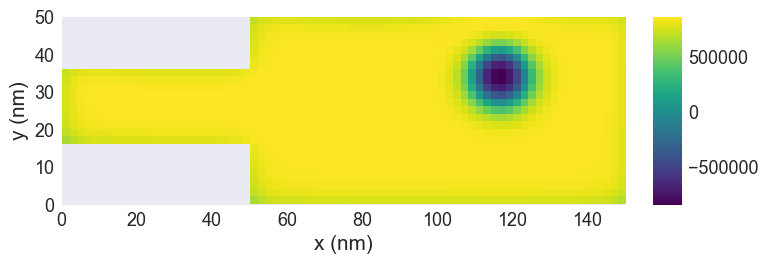

In [6]:
td = oc.TimeDriver()
td.drive(system, t=0.2e-9, n=200, verbose = 2)
system.m.z.sel("z").mpl.scalar()

In [7]:
import micromagneticdata as md

In [8]:
data = md.Data(name='sim1')
data.n

30

In [9]:
data.info

,drive_number,date,time,driver,adapter,n_threads,t,n
0,0,2024-12-23,23:12:23,MinDriver,oommfc,None,NaN,NaN
1,1,2024-12-23,23:13:34,MinDriver,oommfc,None,NaN,NaN
2,2,2024-12-23,23:15:30,TimeDriver,oommfc,None,5.000000e-10,200.0
3,3,2024-12-23,23:16:32,TimeDriver,oommfc,None,5.000000e-10,200.0
4,4,2024-12-23,23:17:00,TimeDriver,oommfc,None,2.000000e-10,200.0
5,5,2024-12-23,23:17:28,MinDriver,oommfc,None,NaN,NaN
6,6,2024-12-23,23:21:55,MinDriver,oommfc,None,NaN,NaN
7,7,2024-12-23,23:22:38,TimeDriver,oommfc,None,2.000000e-10,200.0
8,8,2024-12-23,23:23:07,TimeDriver,oommfc,None,2.000000e-10,200.0
9,9,2024-12-23,23:23:47,TimeDriver,oommfc,None,2.000000e-10,200.0


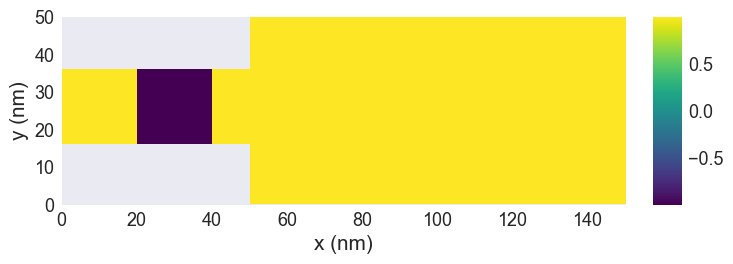

In [10]:
data[10].m0.orientation.sel("z").z.mpl.scalar()

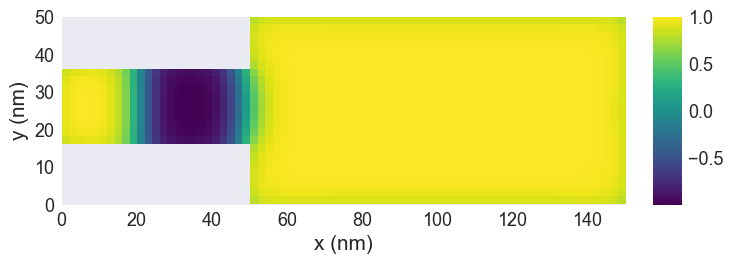

In [11]:
data[10][0].orientation.sel("z").z.mpl.scalar()

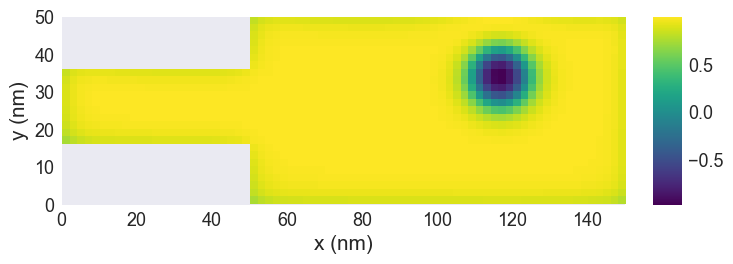

In [12]:
timedrive = data[11]
timedrive[-1].orientation.sel("z").z.mpl.scalar()

In [13]:
timedrive.table.data

,E,E_calc_count,max_dmdt,dE/dt,delta_E,average_u,E_exchange,max_spin_ang_exchange,stage_max_spin_ang_exchange,run_max_spin_ang_exchange,DMI_Cnv_z:dmi:Energy,E_uniaxialanisotropy,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-3.277504e-19,55.0,5141.726643,1.177632e-09,8.723596e-23,400.0,7.326866e-19,24.814571,24.814571,24.814571,-1.714653e-18,6.542158e-19,7.0,7.0,0.0,-0.004483,0.001779,0.794746,7.651646e-14,1.000000e-12
1,-3.261088e-19,80.0,5238.767864,2.068567e-09,2.326822e-22,400.0,7.360812e-19,25.908156,25.908156,25.908156,-1.717708e-18,6.555179e-19,12.0,4.0,1.0,-0.007712,0.002900,0.794632,1.151670e-13,2.000000e-12
2,-3.236724e-19,105.0,5383.461923,2.757598e-09,2.251901e-22,400.0,7.404065e-19,26.844849,26.844849,26.844849,-1.721847e-18,6.577677e-19,17.0,4.0,2.0,-0.010741,0.003458,0.794463,8.257771e-14,3.000000e-12
3,-3.206100e-19,130.0,5543.870573,3.277892e-09,2.662153e-22,400.0,7.455638e-19,27.578576,27.578576,27.578576,-1.727001e-18,6.608267e-19,22.0,4.0,3.0,-0.013518,0.003519,0.794271,8.200733e-14,4.000000e-12
4,-3.170747e-19,155.0,5643.532277,3.725154e-09,5.592141e-22,400.0,7.513460e-19,28.140169,28.140169,28.140169,-1.732993e-18,6.645723e-19,27.0,4.0,4.0,-0.016006,0.003150,0.794085,1.516244e-13,5.000000e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.521050e-20,5218.0,6891.600860,3.748396e-10,3.756299e-23,400.0,1.180922e-18,32.412246,32.412246,34.772623,-1.801821e-18,6.056884e-19,982.0,4.0,195.0,-0.011184,-0.012383,0.912785,1.326118e-13,1.960000e-10
196,-1.468111e-20,5243.0,6939.588139,4.065171e-10,4.381181e-23,400.0,1.180875e-18,32.521897,32.521897,34.772623,-1.801113e-18,6.055564e-19,987.0,4.0,196.0,-0.011176,-0.012374,0.912778,1.342902e-13,1.970000e-10
197,-1.413277e-20,5268.0,6906.796173,3.843589e-10,3.620304e-23,400.0,1.180851e-18,32.495053,32.526934,34.772623,-1.800420e-18,6.054365e-19,992.0,4.0,197.0,-0.011168,-0.012363,0.912767,1.239748e-13,1.980000e-10
198,-1.358000e-20,5299.0,6785.476233,4.150708e-10,4.415274e-23,400.0,1.180835e-18,32.333406,32.495053,34.772623,-1.799738e-18,6.053232e-19,997.0,4.0,198.0,-0.011159,-0.012350,0.912755,1.362194e-13,1.990000e-10


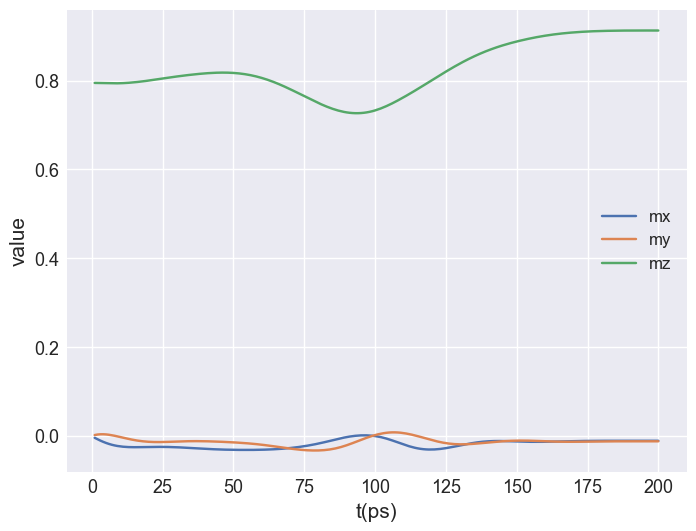

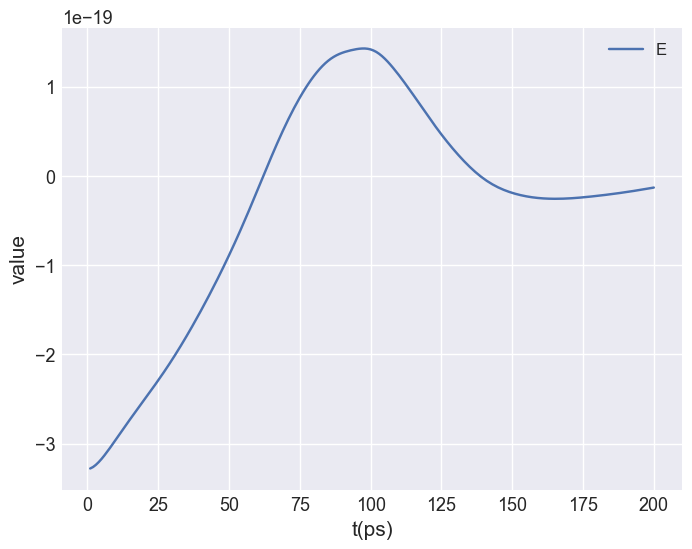

In [21]:
timedrive.table.mpl(y=["mx", "my", "mz"])
timedrive.table.mpl(y=["E"])

In [15]:
finalmagnetisation = timedrive[-1]
top_charge_last_step = df.tools.topological_charge(finalmagnetisation.sel("z"))


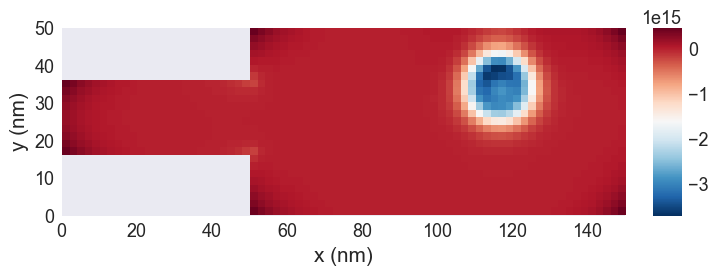

In [16]:
top_charge_density = df.tools.topological_charge_density(finalmagnetisation.sel("z"))
top_charge_density.mpl.scalar(cmap="RdBu_r")

In [17]:
def top_charge_plane(m):
    return df.tools.topological_charge_density(m.sel("z"))
top_charge = timedrive.register_callback(top_charge_plane)

In [18]:
c_min = top_charge_density.array.min()
c_max = top_charge_density.array.max()

top_charge.hv.scalar(kdims=["x", "y"], clim=(c_min, c_max))

BokehModel(combine_events=True, render_bundle={'docs_json': {'161dcd42-755b-4078-b999-00294b6e6b51': {'version…

In [19]:
timedrive.to_xarray()

<xarray.DataArray 'field' (t: 200, x: 75, y: 25, z: 1, vdims: 3)> Size: 9MB
array([[[[[     -0.        ,      -0.        ,      -0.        ]],

         [[      0.        ,      -0.        ,       0.        ]],

         [[     -0.        ,       0.        ,      -0.        ]],

         ...,

         [[     -0.        ,      -0.        ,      -0.        ]],

         [[     -0.        ,      -0.        ,      -0.        ]],

         [[      0.        ,       0.        ,      -0.        ]]],


        [[[      0.        ,       0.        ,      -0.        ]],

         [[      0.        ,       0.        ,      -0.        ]],

         [[     -0.        ,       0.        ,       0.        ]],
...

         [[ 206150.94988357,  192853.69901787,  812347.97755471]],

         [[ 207646.76177734,  302586.35482785,  777768.80896278]]],


        [[[ 320380.82639351, -433605.90740518,  670031.37474505]],

         [[ 321179.97783025, -330269.92319879,  726199.14601384]],

         [[ 324201.77859895, -251122.91579567,  755930.21365438]],

         ...,

         [[ 317233.93383636,  110551.74382552,  791669.71848104]],

         [[ 315391.33259683,  189267.08582917,  777371.38971314]],

         [[ 315660.08760124,  297701.00139129,  742517.89397038]]]]],
      shape=(200, 75, 25, 1, 3))
Coordinates:
  * x        (x) float64 600B 1e-09 3e-09 5e-09 ... 1.45e-07 1.47e-07 1.49e-07
  * y        (y) float64 200B 1e-09 3e-09 5e-09 ... 4.5e-08 4.7e-08 4.9e-08
  * z        (z) float64 8B 1e-09
  * vdims    (vdims) <U1 12B 'x' 'y' 'z'
  * t        (t) float64 2kB 1e-12 2e-12 3e-12 4e-12 ... 1.98e-10 1.99e-10 2e-10
Attributes:
    drive_number:  11
    date:          2024-12-23
    time:          23:24:10
    driver:        TimeDriver
    adapter:       oommfc
    t:             2e-10
    n:             200
    n_threads:     None